In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(columns=['age', 'gender', 'BMI', 'gluc','smoke', 'alco', 'active', 'risk_group'])



Some asumptions. Andalucia in 2019 had a total population of 8.414.240 people. <br>
Between 30 and 80 years old there are 5.298.211 people. <br>
Since thats a lot of data, we are going to reduce everything (at least for now) to 1.000.000 subjetcs. <br>
Our relation X will be: X = 1.000.000 / 5.298.211 = 0.188742955

In [3]:
import time
start_time = time.time()
# Creating a 1 dimensional numpy array
data = np.full((1, 10**6), 0)

# Creating pandas dataframe from numpy array
%time df = pd.DataFrame({'age':data[0,:], 'gender':data[0,:], 'BMI':data[0,:], 'gluc':data[0,:],'smoke':data[0,:] ,'alco':data[0,:], 'active':data[0,:], 'risk_group':data[0,:]})

print ("My program took", time.time() - start_time, "to run")

df
    


Wall time: 10 ms
My program took 0.013068914413452148 to run


,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,0
999996,0,0,0,0,0,0,0,0
999997,0,0,0,0,0,0,0,0
999998,0,0,0,0,0,0,0,0


Lets putting some numbers here.

All original values will be multiplied by our factor 0.188742955.

Also, Andalucia has a population of 50.812% women and a 49.188% of men in the range of 30-80 years old.

Total population (30-80 years):  5.298.211  --> 1.000.000 <br>
Total man (30-80 years): 491.880 <br>
Total woman (30-80 years): 508.120 

# SETTING GENDER

In [4]:
df.gender[:int(0.50812*len(df.gender))] = 1 #women
df.gender[int(0.49188*len(df.gender)):] = 2 #men

In [5]:
%time df

Wall time: 0 ns


,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
999995,0,2,0,0,0,0,0,0
999996,0,2,0,0,0,0,0,0
999997,0,2,0,0,0,0,0,0
999998,0,2,0,0,0,0,0,0


In [6]:
df.gender.value_counts()

2    508120
1    491880
Name: gender, dtype: int64

In [7]:
##################
#REDUCTION FACTOR#
##################
factor = 0.188742955

# SETTING AGES

In [8]:
# male_age_quant = np.array([266932, 270659, 275244, 283423, 294140, 304859, 319552, 337370,
#        354531, 369466, 385117, 398512, 405797, 408319, 405506, 399090,
#        393506, 388862, 382155, 376626, 372004, 370087, 365477, 357896,
#        356809, 349375, 333530, 322155, 317622, 312398, 302728, 293736,
#        278553, 263113, 251056, 243436, 242089, 231903, 219076, 217546,
#        223353, 215807, 197805, 193540, 189393, 179191, 161904, 140264,
#        143961, 126742, 102011])

# male_age_quant_scaled = factor*male_age_quant

male_age_quant = np.array([266862,320386,356026,338446,327274,
                            285488,236005,192014,166565,117024])
print(sum(male_age_quant))

male_age_quant_scaled = factor*male_age_quant

print(male_age_quant_scaled)
print(sum(male_age_quant_scaled))


2606090
[50368.32245721 60470.60038063 67197.39929683 63879.29814793
 61770.66185467 53883.84873704 44544.28109477 36241.28976137
 31437.97029957 22087.45556592]
491881.12759595


In [9]:
len(male_age_quant_scaled)

10

In [10]:
# female_age_quant = np.array([265410, 270922, 277663, 286535, 297310, 308535, 322762, 339042,
#        354748, 368485, 381582, 391233, 397094, 399112, 396242, 390252,
#        384388, 381141, 376223, 372419, 369695, 369978, 366840, 361463,
#        362968, 356217, 341971, 332727, 329457, 325340, 316883, 309461,
#        295658, 281153, 270642, 263996, 262202, 252851, 241912, 243883,
#        253589, 246863, 229898, 228844, 226438, 217007, 198612, 174744,
#        184465, 168130, 140816])

# female_age_quant_scaled = factor*female_age_quant
# #len(female_age_quant)

female_age_quant = np.array([263315,315330,347925,335167,333783,
294715,249692,208093,193456,150645])

female_age_quant_scaled = factor*female_age_quant
#len(female_age_quant)

print(female_age_quant_scaled)
print(sum(female_age_quant_scaled))

[49698.85119582 59516.31600015 65668.39261838 63260.40999848
 62999.18974876 55625.37998282 47127.60591986 39276.08773481
 36513.45710248 28433.18245597]
508118.872757555


In [11]:
male_lower_limit = 0
male_upper_value = 0
female_lower_limit = 0
female_upper_value = 0

print('------------------------- man values --------------------------')
for i in range(len(male_age_quant_scaled)):
    if i==0: #setting the first age group
        male_lower_limit += 0
        male_upper_value += int(round(male_age_quant_scaled[i]))
        df.age[male_lower_limit:male_upper_value] = np.random.choice(range((i*5+30), (i*5+35)), 
                                                                     size=int(round(male_age_quant_scaled[i])))
        
    elif i == -1: #setting the rest of the age group
        male_lower_limit += int(round(male_age_quant_scaled[i-1]))
        male_upper_value += int(round(male_age_quant_scaled[i]))
        df.age[male_lower_limit:male_upper_value] = np.random.choice(range((i*5+30), (i*5+36)), 
                                                                     size=int(round(male_age_quant_scaled[i])))
    
    
    else: #setting the rest of the age group
        male_lower_limit += int(round(male_age_quant_scaled[i-1]))
        male_upper_value += int(round(male_age_quant_scaled[i]))
        df.age[male_lower_limit:male_upper_value] = np.random.choice(range((i*5+30), (i*5+35)), 
                                                                     size=int(round(male_age_quant_scaled[i])))
    print('male_lower_limit',male_lower_limit)
    print('male_upper_value',male_upper_value)
    print('years', 30+i*5)
    print('quantity', male_age_quant[i])
    print('scaled quantity', male_age_quant_scaled[i])
    print(len(df.loc[df.age ==(30+i*5)]))
    print('accumulative_quantity', male_upper_value)
    print('-'*30)

print('------------------------- woman values --------------------------')
for i in range(len(female_age_quant_scaled)):
    if i==0: #setting the first age group
        female_lower_limit += male_upper_value
        female_upper_value += (male_upper_value + int(round(female_age_quant_scaled[i])))
#         df.age[female_lower_limit:female_upper_value] = random.randint((i*5+30), (i*5+34))
        df.age[female_lower_limit:female_upper_value] = np.random.choice(range((i*5+30), (i*5+35)), 
                                                                         size=int(round(female_age_quant_scaled[i])))
    
    elif i == -1: #setting the last age group
        female_lower_limit += int(round(female_age_quant_scaled[i-1]))
        female_upper_value += int(round(female_age_quant_scaled[i]))
        df.age[female_lower_limit:female_upper_value] = np.random.choice(range((i*5+30), (i*5+36)), 
                                                                         size=int(round(female_age_quant_scaled[i])))
        
    else: #setting the rest of the age group
        female_lower_limit += int(round(female_age_quant_scaled[i-1]))
        female_upper_value += int(round(female_age_quant_scaled[i]))
        df.age[female_lower_limit:female_upper_value] = np.random.choice(range((i*5+30), (i*5+35)), 
                                                                         size=int(round(female_age_quant_scaled[i])))
    print('years', 30+i*5)
    print('quantity', male_age_quant[i])
    print(len(df.loc[df.age ==(30+i*5)]))
    print('accumulative_quantity', male_upper_value)
    print('-'*30)

df.age[df.age == 0] = 80
df.age[df.age == 79] = np.random.choice(range(79,81), size = len(df.age[df.age == 79]))

------------------------- man values --------------------------
male_lower_limit 0
male_upper_value 50368
years 30
quantity 266862
scaled quantity 50368.32245721
10046
accumulative_quantity 50368
------------------------------
male_lower_limit 50368
male_upper_value 110839
years 35
quantity 320386
scaled quantity 60470.60038063
12264
accumulative_quantity 110839
------------------------------
male_lower_limit 110839
male_upper_value 178036
years 40
quantity 356026
scaled quantity 67197.39929683
13416
accumulative_quantity 178036
------------------------------
male_lower_limit 178036
male_upper_value 241915
years 45
quantity 338446
scaled quantity 63879.29814793
12735
accumulative_quantity 241915
------------------------------
male_lower_limit 241915
male_upper_value 303686
years 50
quantity 327274
scaled quantity 61770.66185467
12287
accumulative_quantity 303686
------------------------------
male_lower_limit 303686
male_upper_value 357570
years 55
quantity 285488
scaled quantity 53883

In [12]:
df

,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,32,1,0,0,0,0,0,0
1,32,1,0,0,0,0,0,0
2,30,1,0,0,0,0,0,0
3,30,1,0,0,0,0,0,0
4,32,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
999995,75,2,0,0,0,0,0,0
999996,79,2,0,0,0,0,0,0
999997,80,2,0,0,0,0,0,0
999998,80,2,0,0,0,0,0,0


In [13]:
df.age.unique()

array([32, 30, 31, 33, 34, 39, 35, 36, 37, 38, 41, 42, 44, 43, 40, 48, 46,
       45, 47, 49, 53, 52, 54, 51, 50, 56, 59, 58, 57, 55, 61, 62, 64, 63,
       60, 65, 66, 68, 69, 67, 73, 72, 74, 71, 70, 76, 80, 78, 79, 75, 77])

In [14]:
df.age.value_counts()

44    26801
40    26700
42    26648
41    26413
43    26303
48    25696
47    25397
46    25377
45    25354
49    25315
53    25080
52    25059
51    24908
54    24873
50    24850
35    24361
38    24105
39    23893
37    23844
36    23784
57    22056
59    21924
55    21894
56    21880
58    21755
33    20128
34    20059
31    19975
32    19968
30    19937
60    18531
62    18474
61    18287
64    18199
63    18181
67    15226
65    15150
68    15116
69    15060
66    14965
72    13708
74    13625
70    13554
73    13551
71    13513
75    10117
77    10087
78    10085
76    10020
80     5111
79     5103
Name: age, dtype: int64

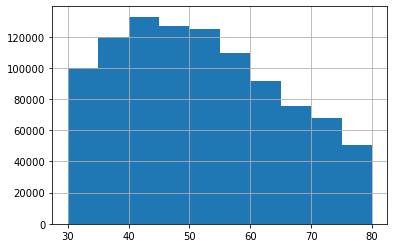

In [15]:
df.age.hist()

In [16]:
#df.loc[(df.age == 80) & (df.gender==1)]

# SETTING BMI

In [17]:
import random 

# each weight is defined
weight_under = random.uniform(16, 18.5)
weight_normal = random.uniform(18.5, 24.9)
weight_over = random.uniform(24.9, 29.9)
weight_obesity = random.uniform(29.9, 32.5)
# all weights are grouped
weights = [weight_under, weight_normal, weight_over, weight_obesity]
# the "don't know answer" is placed
weight_NSNC = random.choice(weights)
# all weights are grouped again
list_weights = [weight_under, weight_normal, weight_over, weight_obesity, weight_NSNC]

#the ages to create age intervals
weight_range = [25, 35, 45, 55, 65, 75, 85]

#the weight probability according to age intervals
male_weight_under_prob   = [0.4,0.5,0.7,0.4,0.2,0.7]
male_weight_normal_prob  = [52.8,40.0,29.1,24.7,24.5,26.4]
male_weight_over_prob    = [35.7,43.4,49.7,49.7,50.6,54.8]
male_weight_obesity_prob = [11.1,16.2,20.5,25.2,24.7,18.1]

#divind by 100
male_weight_under_prob   = [x / 100 for x in male_weight_under_prob]
male_weight_normal_prob  = [x / 100 for x in male_weight_normal_prob]
male_weight_normal_prob  = [x -0.1 for x in male_weight_normal_prob]
male_weight_over_prob    = [x / 100 for x in male_weight_over_prob]
male_weight_obesity_prob = [x / 100 for x in male_weight_obesity_prob]


male_weight_NSNC_prob    = []
for i in range(len(male_weight_under_prob)):
    prob = 1-male_weight_under_prob[i]-male_weight_normal_prob[i]-male_weight_over_prob[i]-male_weight_obesity_prob[i]
    if prob < 0:
        print('error with', i, 'prob =',prob )
        
    if prob >= 0:
        male_weight_NSNC_prob.append(prob)


In [18]:
# #for men, df.gender==2
#male_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2)]
# #for women, df.gender==1
# female_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 1)]


for i in range(6):
    #for men, df.gender==2
    male_weights_pop = len(df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2)])

    df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2), 'BMI'] = np.random.choice(list_weights, 
                                                                                                                     male_weights_pop, 
                                                                                                                     p=[male_weight_under_prob[i], 
                                                                                                                    male_weight_normal_prob[i], 
                                                                                                                         male_weight_over_prob[i], 
                                                                                                                         male_weight_obesity_prob[i],
                                                                                                                       male_weight_NSNC_prob[i]])


In [19]:
df

,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,32,1,0.000000,0,0,0,0,0
1,32,1,0.000000,0,0,0,0,0
2,30,1,0.000000,0,0,0,0,0
3,30,1,0.000000,0,0,0,0,0
4,32,1,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...
999995,75,2,26.421483,0,0,0,0,0
999996,79,2,18.626254,0,0,0,0,0
999997,80,2,18.626254,0,0,0,0,0
999998,80,2,26.421483,0,0,0,0,0


In [20]:
import random 

# each weight is defined
weight_under = random.uniform(16, 18.5)
weight_normal = random.uniform(18.5, 24.9)
weight_over = random.uniform(24.9, 29.9)
weight_obesity = random.uniform(29.9, 32.5)
# all weights are grouped
weights = [weight_under, weight_normal, weight_over, weight_obesity]
# the "don't know answer" is placed
weight_NSNC = random.choice(weights)
# all weights are grouped again
list_weights = [weight_under, weight_normal, weight_over, weight_obesity, weight_NSNC]

#the ages to create age intervals
weight_range = [25, 35, 45, 55, 65, 75, 85]

#the weight probability according to age intervals
female_weight_under_prob   = [6.9,3.4,2.0,1.3,1.5,0.9]
female_weight_normal_prob  = [52.8,40.0,29.1,24.7,24.5,26.4]
female_weight_over_prob    = [21.8,24.4,29.3,39.5,39.1,40.5]
female_weight_obesity_prob = [10.6,12.9,15.7,18.8,26.3,28.0]

#divind by 100
female_weight_under_prob   = [x / 100 for x in male_weight_under_prob]
female_weight_normal_prob  = [x / 100 for x in male_weight_normal_prob]
female_weight_normal_prob  = [x -0.1 for x in male_weight_normal_prob]
female_weight_over_prob    = [x / 100 for x in male_weight_over_prob]
female_weight_obesity_prob = [x / 100 for x in male_weight_obesity_prob]


female_weight_NSNC_prob    = []
for i in range(len(female_weight_under_prob)):
    prob = 1-female_weight_under_prob[i]-female_weight_normal_prob[i]-female_weight_over_prob[i]-female_weight_obesity_prob[i]
    if prob < 0:
        print('error with', i, 'prob =',prob )
        
    if prob >= 0:
        female_weight_NSNC_prob.append(prob)

In [21]:
for i in range(6):
    #for men, df.gender==2
    female_weights_pop = len(df.loc[(df.age >= weight_range[i]) &
                                    (df.age < weight_range[i+1]) &
                                    (df.gender == 1)])

    df.loc[(df.age >= weight_range[i]) &
           (df.age < weight_range[i+1]) &
           (df.gender == 1), 'BMI'] = np.random.choice(list_weights, 
                                                       female_weights_pop, 
                                                       p=[female_weight_under_prob[i], 
                                                       female_weight_normal_prob[i], 
                                                       female_weight_over_prob[i], 
                                                       female_weight_obesity_prob[i],
                                                       female_weight_NSNC_prob[i]])


In [22]:
df

,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,32,1,17.779896,0,0,0,0,0
1,32,1,17.779896,0,0,0,0,0
2,30,1,21.000116,0,0,0,0,0
3,30,1,21.000116,0,0,0,0,0
4,32,1,17.779896,0,0,0,0,0
...,...,...,...,...,...,...,...,...
999995,75,2,26.421483,0,0,0,0,0
999996,79,2,18.626254,0,0,0,0,0
999997,80,2,18.626254,0,0,0,0,0
999998,80,2,26.421483,0,0,0,0,0


In [23]:
df.loc[df.BMI == 0].sum()


age           0.0
gender        0.0
BMI           0.0
gluc          0.0
smoke         0.0
alco          0.0
active        0.0
risk_group    0.0
dtype: float64

# SETTING DIABETES

In [24]:
gluc_bool = [3,1]
#the ages to create age intervals
gluc_range = [25, 35, 45, 55, 65, 75, 85]

#the non smoking probability according to men age intervals
male_diabetes_prob   = [0.0036,0.0207,0.0468,0.1505,0.2492,0.2489]
#the smoking probability according to men age intervals
male_nondiabetes_prob   = [1 - x  for x in male_diabetes_prob]


#the non smoking probability according to women age intervals
female_diabetes_prob   = [0.0099,0.011,0.0321,0.0737,0.1801,0.2422]
#the smoking probability according to women age intervals
female_nondiabetes_prob   = [1 - x  for x in female_diabetes_prob]

In [25]:
# #for men, df.gender==2
#male_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2)]
# #for women, df.gender==1
# female_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 1)]


for i in range(6):
    #for men, df.gender==2
    male_gluc_pop = len(df.loc[(df.age >= gluc_range[i]) &
                                (df.age < gluc_range[i+1]) &
                                (df.gender == 2)])

    df.loc[(df.age >= gluc_range[i]) &
           (df.age < gluc_range[i+1]) &
           (df.gender == 2), 'gluc'] = np.random.choice(gluc_bool,  
                                                         male_gluc_pop, 
                                                         p=[male_diabetes_prob[i],
                                                            male_nondiabetes_prob[i]])

    #for woman, df.gender==1
    female_gluc_pop = len(df.loc[(df.age >= gluc_range[i]) &
                                (df.age < gluc_range[i+1]) &
                                (df.gender == 1)])

    df.loc[(df.age >= gluc_range[i]) &
           (df.age < gluc_range[i+1]) &
           (df.gender == 1), 'gluc'] = np.random.choice(gluc_bool,  
                                                         female_gluc_pop, 
                                                         p=[female_diabetes_prob[i],
                                                            female_nondiabetes_prob[i]])

# SETTING SMOKE

In this feature, a person who smokes everyday, usually or was an smoker will be consider in medical terms "smoker".
To do this, the probability of "smoking" (being a 1 in the dataset) will be just:
1 - prob of non-smoker

In [26]:
import random 

smoke_bool = [0,1]
#the ages to create age intervals
smoke_range = [25, 35, 45, 55, 65, 75, 85]

#the non smoking probability according to men age intervals
male_nonsmoke_prob   = [0.46,0.45,0.31,0.31,0.32,0.40]
#the smoking probability according to men age intervals
male_smoke_prob   = [1 - x  for x in male_nonsmoke_prob]

#the non smoking probability according to women age intervals
female_nonsmoke_prob   = [0.5528,0.5278,0.4557,0.6536,0.8684,0.9581]
#the smoking probability according to women age intervals
female_smoke_prob   = [1 - x  for x in female_nonsmoke_prob]

In [27]:
# #for men, df.gender==2
#male_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2)]
# #for women, df.gender==1
# female_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 1)]


for i in range(6):
    #for men, df.gender==2
    male_smoke_pop = len(df.loc[(df.age >= smoke_range[i]) &
                                (df.age < smoke_range[i+1]) &
                                (df.gender == 2)])

    df.loc[(df.age >= smoke_range[i]) &
           (df.age < smoke_range[i+1]) &
           (df.gender == 2), 'smoke'] = np.random.choice(smoke_bool,  
                                                         male_smoke_pop, 
                                                         p=[male_nonsmoke_prob[i],
                                                            male_smoke_prob[i]])

    #for woman, df.gender==1
    female_smoke_pop = len(df.loc[(df.age >= smoke_range[i]) &
                                (df.age < smoke_range[i+1]) &
                                (df.gender == 1)])

    df.loc[(df.age >= smoke_range[i]) &
           (df.age < smoke_range[i+1]) &
           (df.gender == 1), 'smoke'] = np.random.choice(smoke_bool,  
                                                         female_smoke_pop, 
                                                         p=[female_nonsmoke_prob[i],
                                                            female_smoke_prob[i]])

In [28]:
df.smoke.value_counts()

1    518269
0    481731
Name: smoke, dtype: int64

In [29]:
df.loc[(df.smoke == 1) & (df.age == 40)]

,age,gender,BMI,gluc,smoke,alco,active,risk_group
110850,40,1,21.000116,1,1,0,0,0
110858,40,1,21.000116,1,1,0,0,0
110865,40,1,17.779896,1,1,0,0,0
110872,40,1,17.779896,1,1,0,0,0
110882,40,1,21.000116,1,1,0,0,0
...,...,...,...,...,...,...,...,...
666753,40,2,18.626254,1,1,0,0,0
666755,40,2,32.159673,1,1,0,0,0
666756,40,2,18.626254,1,1,0,0,0
666759,40,2,26.421483,1,1,0,0,0


# SETTING ALCOHOL CONSUMPTION

An alcohol consumptiom of "once or more than once in a month" is consider as a 1. Data from INE, year 2009.

In [30]:
import random 

alco_bool = [0,1]
#the ages to create age intervals
alco_range = [25, 45, 65, 85]

#the non smoking probability according to men age intervals
male_nonalco_prob   = [0.2,0.2,0.3]
#the smoking probability according to men age intervals
male_alco_prob   = [1 - x  for x in male_nonalco_prob]

#the non smoking probability according to women age intervals
female_nonalco_prob   = [0.4,0.5,0.6]
#the smoking probability according to women age intervals
female_alco_prob   = [1 - x  for x in female_nonalco_prob]

In [31]:
# #for men, df.gender==2
#male_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2)]
# #for women, df.gender==1
# female_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 1)]


for i in range(3):
    #for men, df.gender==2
    male_alco_pop = len(df.loc[(df.age >= alco_range[i]) &
                                (df.age < alco_range[i+1]) &
                                (df.gender == 2)])

    df.loc[(df.age >= alco_range[i]) &
           (df.age < alco_range[i+1]) &
           (df.gender == 2), 'alco'] = np.random.choice(alco_bool,  
                                                         male_alco_pop, 
                                                         p=[male_nonalco_prob[i],
                                                            male_alco_prob[i]])

    #for woman, df.gender==1
    female_alco_pop = len(df.loc[(df.age >= alco_range[i]) &
                                (df.age < alco_range[i+1]) &
                                (df.gender == 1)])

    df.loc[(df.age >= alco_range[i]) &
           (df.age < alco_range[i+1]) &
           (df.gender == 1), 'alco'] = np.random.choice(alco_bool,  
                                                         female_alco_pop, 
                                                         p=[female_nonalco_prob[i],
                                                            female_alco_prob[i]])

In [32]:
df

,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,32,1,17.779896,3,1,0,0,0
1,32,1,17.779896,1,1,1,0,0
2,30,1,21.000116,1,0,1,0,0
3,30,1,21.000116,1,1,1,0,0
4,32,1,17.779896,1,0,0,0,0
...,...,...,...,...,...,...,...,...
999995,75,2,26.421483,1,0,1,0,0
999996,79,2,18.626254,1,1,1,0,0
999997,80,2,18.626254,1,0,1,0,0
999998,80,2,26.421483,3,1,1,0,0


# SETTING SEDENTARINESS

A sedentary life is consider as a 0 in 'active' column. Data from INE, year 2009.


In [33]:
active_bool = [0,1]
#the ages to create age intervals
active_range = [25, 35, 45, 55, 65, 75, 85]

#the non active probability according to men age intervals
male_nonactive_prob   = [0.293,0.349,0.391,0.344,0.289,0.386]
#the active probability according to men age intervals
male_active_prob   = [1 - x  for x in male_nonactive_prob]


#the non active probability according to women age intervals
female_nonactive_prob   = [0.399,0.432,0.352,0.372,0.388,0.587]
#the active probability according to women age intervals
female_active_prob   = [1 - x  for x in female_nonactive_prob]

In [34]:
# #for men, df.gender==2
#male_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 2)]
# #for women, df.gender==1
# female_weights_pop = df.loc[(df.age >= weight_range[i]) & (df.age < weight_range[i+1]) & (df.gender == 1)]


for i in range(6):
    #for men, df.gender==2
    male_active_pop = len(df.loc[(df.age >= active_range[i]) &
                                (df.age < active_range[i+1]) &
                                (df.gender == 2)])

    df.loc[(df.age >= active_range[i]) &
           (df.age < active_range[i+1]) &
           (df.gender == 2), 'active'] = np.random.choice(active_bool,  
                                                         male_active_pop, 
                                                         p=[male_nonactive_prob[i],
                                                            male_active_prob[i]])

    #for woman, df.gender==1
    female_active_pop = len(df.loc[(df.age >= active_range[i]) &
                                (df.age < active_range[i+1]) &
                                (df.gender == 1)])

    df.loc[(df.age >= active_range[i]) &
           (df.age < active_range[i+1]) &
           (df.gender == 1), 'active'] = np.random.choice(active_bool,  
                                                         female_active_pop, 
                                                         p=[female_nonactive_prob[i],
                                                            female_active_prob[i]])

In [35]:
df

,age,gender,BMI,gluc,smoke,alco,active,risk_group
0,32,1,17.779896,3,1,0,1,0
1,32,1,17.779896,1,1,1,0,0
2,30,1,21.000116,1,0,1,1,0
3,30,1,21.000116,1,1,1,0,0
4,32,1,17.779896,1,0,0,1,0
...,...,...,...,...,...,...,...,...
999995,75,2,26.421483,1,0,1,0,0
999996,79,2,18.626254,1,1,1,1,0
999997,80,2,18.626254,1,0,1,1,0
999998,80,2,26.421483,3,1,1,1,0


In [36]:
df.to_csv('country-model-v01.csv')